## Importing the Libraries

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Dataset

In [2]:
dataset = pd.read_csv("segmentation data.csv")
dataset.head()
dataset.drop(columns=['ID'],axis=1)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0


# K-means Model on the dataset

## Elbow Method

C:\Users\yucel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


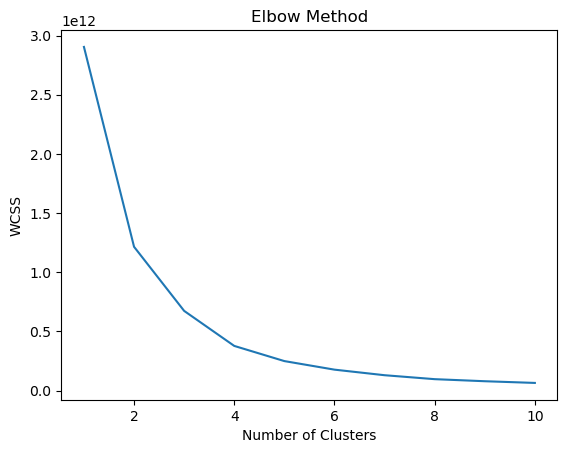

In [3]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans= KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

## Training the K-Means model on the dataset

In [4]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4,init='k-means++')
ykmeans=kmeans.fit_predict(dataset)
ykmeans

array([0, 3, 2, ..., 2, 0, 2])

## Visualising the clusters

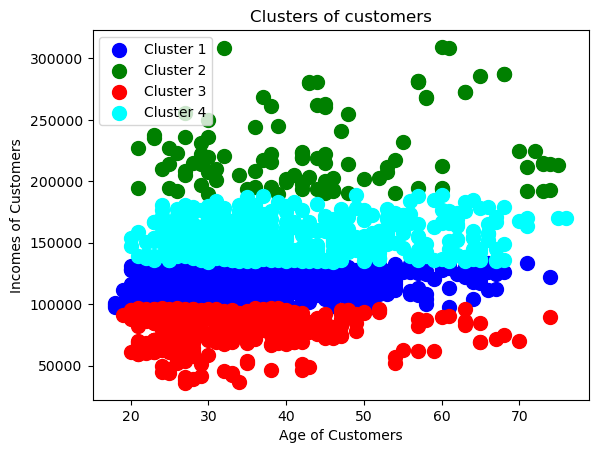

In [10]:
#visulaizing the clusters  
plt.scatter(dataset["Age"][ykmeans == 0], dataset['Income'][ykmeans == 0], s = 100, 
            c = 'blue', label = 'Cluster 1')   
plt.scatter(dataset["Age"][ykmeans == 1], dataset['Income'][ykmeans == 1], s = 100, 
            c = 'green', label = 'Cluster 2') 
plt.scatter(dataset["Age"][ykmeans == 2], dataset['Income'][ykmeans == 2], s = 100, 
            c = 'red', label = 'Cluster 3') 
plt.scatter(dataset["Age"][ykmeans == 3], dataset['Income'][ykmeans == 3], s = 100, 
            c = 'cyan', label = 'Cluster 4')  

# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
#             s = 300, c = 'yellow', label = 'Centroid')   

plt.title('Clusters of customers')  
plt.xlabel('Age of Customers')  
plt.ylabel('Incomes of Customers')  
plt.legend()  
plt.show()  

## Visualising the clusters (It is written by furkanyaylaz)

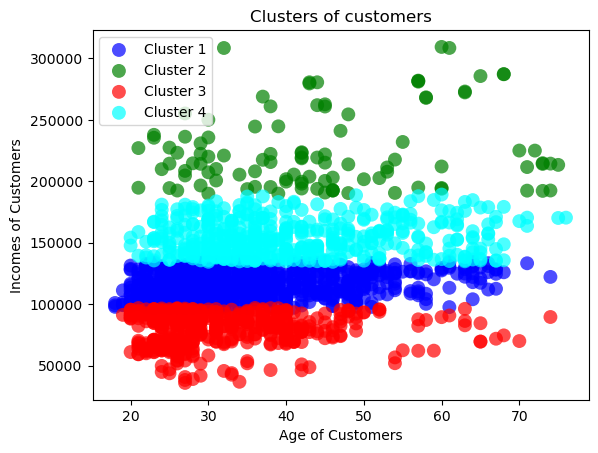

In [11]:
cluster_x = []
cluster_y = []
cluster_centers = kmeans.cluster_centers_
for i in range(8):
    if i % 2 == 0:
        cluster_x.append(cluster_centers[3][i])
        cluster_y.append(cluster_centers[3][i+1])
cluster_x = np.array(cluster_x)
cluster_y = np.array(cluster_y)

dataset["Cluster"] = ykmeans
colors = ['blue', 'green', 'red', 'cyan']
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
cluster_centers = kmeans.cluster_centers_
fig, ax = plt.subplots()
for i in range(len(colors)):
    x = dataset.loc[dataset['Cluster']==i , "Age"]
    y = dataset.loc[dataset['Cluster']==i , "Income"]
    ax.scatter(x, y, c=colors[i], s=100, label=labels[i], alpha=0.7, edgecolors='none')


# ax.scatter(cluster_x, cluster_y, c='yellow', s=200, marker='o', label='Center')

plt.title('Clusters of customers')  
plt.xlabel('Age of Customers')  
plt.ylabel('Incomes of Customers')  
plt.legend()  
plt.show()

## Note: The part we couldn't do as two friends was the centroid part. I would also like to thank my friend Furkan for showing me another way of visualizing, so I wanted to add that too.